<a href="https://colab.research.google.com/github/raohxxx/TelecomX_Challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción
###carga de datos desde la web

In [43]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


# Leer JSON desde la URL
url3 = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
url1='https://raw.githubusercontent.com/raohxxx/TelecomX_Challenge/refs/heads/main/TelecomX_Data.json'#desde mi repositorio
#otro metodo usando libreria request
#response = requests.get(url1)
#datos_json = response.json()

# Crear DataFrame original
#df_original = pd.DataFrame(datos_json)
df_original=pd.read_json(url1)
# Crear DataFrame original
#df_original = pd.DataFrame(datos_json)

# Columnas a normalizar
cols_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Diccionario para guardar DataFrames normalizados
dfs_normalizados = {}

for col in cols_a_normalizar:
    if col in df_original.columns:
        df_norm = pd.json_normalize(df_original[col])
        df_norm.columns = [f"{col}_{subcol}" for subcol in df_norm.columns]
        dfs_normalizados[col] = df_norm
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Concatenar DataFrames normalizados
df_final = pd.concat(dfs_normalizados.values(), axis=1)

# Agregar columnas customerID y churn
for col in ['customerID', 'Churn']:
    if col in df_original.columns:
        df_final[col] = df_original[col]
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Reordenar columnas: customerID y churn al inicio
columnas = ['customerID', 'Churn'] + [col for col in df_final.columns if col not in ['customerID', 'Churn']]
df_final = df_final[columnas]

# Mostrar información final
print(df_final.info())
df_final.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#🔧 Transformación

###escoger columnas categoricas

In [44]:
columnas=list(df_final.columns)
# Nombres de las columnas que quieres remover de la lista
columnas_a_remover = ['customerID', 'customer_SeniorCitizen','customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']

# Remover las columnas de la lista 'columnas'
for col_nombre in columnas_a_remover:
    if col_nombre in columnas: # Verificar si la columna está en la lista antes de remover
        columnas.remove(col_nombre)

# Ahora, la lista 'columnas' no contendrá las columnas que especificaste.
# Puedes imprimirla para verificar
print(columnas)

# Si quieres usar esta lista para crear una nueva lista de columnas categóricas
columnasCategory = columnas
print(columnasCategory)
#columnas_a_cambiar = ['columna1', 'columna2', 'columna3']
for columna in columnasCategory:
    df_final[columna] = df_final[columna].astype('category') # O el tipo de dato que necesites
df_final.info()

['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID              

In [45]:
df_final.dtypes

,0
customerID,object
Churn,category
customer_gender,category
customer_SeniorCitizen,int64
customer_Partner,category
customer_Dependents,category
customer_tenure,int64
phone_PhoneService,category
phone_MultipleLines,category
internet_InternetService,category


### Cambiar las columnas customerID a string,customer_tenure a int y account_Charges.Total to float

In [46]:
# Cambiar el tipo de la columna 'customerID' a string (str)
df_final['customerID'] = df_final['customerID'].astype(str)
df_final['customer_tenure'] = df_final['customer_tenure'].astype(int)
# Cambiar el tipo de la columna 'account_Charges.Total' a float
# Es importante manejar posibles errores o valores no numéricos antes de la conversión a float
# Por ejemplo, puedes reemplazar valores no numéricos o usar errors='coerce'
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# Si después de convertir a numérico hay NaNs (debido a errors='coerce'),
# puedes optar por rellenarlos si es necesario, por ejemplo, con 0
# df_final['account_Charges.Total'] = df_final['account_Charges.Total'].fillna(0)

# Para verificar los tipos de datos después de los cambios
print(df_final.dtypes)



customerID                     object
Churn                        category
customer_gender              category
customer_SeniorCitizen          int64
customer_Partner             category
customer_Dependents          category
customer_tenure                 int64
phone_PhoneService           category
phone_MultipleLines          category
internet_InternetService     category
internet_OnlineSecurity      category
internet_OnlineBackup        category
internet_DeviceProtection    category
internet_TechSupport         category
internet_StreamingTV         category
internet_StreamingMovies     category
account_Contract             category
account_PaperlessBilling     category
account_PaymentMethod        category
account_Charges.Monthly       float64
account_Charges.Total         float64
dtype: object


###Renombrar Columnas del DataFrame usando un diccionario de Python

In [47]:
cols_nuevas = {
    'index': 'INDICE',
    'customerID': 'IDcliente',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'ADULTO_MAYOR',
    'customer_Partner': 'CON_PAREJA',
    'customer_Dependents': 'CLIENTE_CON_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'S_INTERNET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'TV_STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'}

df_final= df_final.rename(columns=cols_nuevas)

# To verify the changes, you can print the new column names
#print(df_final.columns)
df_final.sample(5)

,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
6308,8676-TRMJS,Yes,Male,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,75.00,209.10
2418,3374-TTZTK,No,Male,0,Yes,No,52,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,106.30,5487.00
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50
756,1084-UQCHV,Yes,Male,0,No,Yes,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.75,69.75
6546,8993-IZEUX,No,Male,0,No,No,7,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.15,488.65


##verificacion de las columnas que estaban con datos nulos en la Cargo Total

In [48]:
print(df_final[df_final['ANTIGUEDAD_CLIENTE'] == 0]['CARGO_TOTAL'])

975    NaN
1775   NaN
1955   NaN
2075   NaN
2232   NaN
2308   NaN
2930   NaN
3134   NaN
3203   NaN
4169   NaN
5599   NaN
Name: CARGO_TOTAL, dtype: float64


###Filtrado de  de filas  con datos NaN

In [49]:
filas_vacias=df_final.isna().sum()
print(type(filas_vacias))
nombre_de_la_columna = 'CARGO_TOTAL'  # Reemplaza con el nombre de tu columna

# Filtrar el DataFrame para mostrar solo las filas donde la columna especificada tiene valores nulos
filas_con_valores_vacios = df_final[df_final[nombre_de_la_columna].isna()]

# Para mostrar las filas encontradas
print(f"Filas con valores vacíos en la columna '{nombre_de_la_columna}':")
display(filas_con_valores_vacios)

# Opcionalmente, para saber cuántas filas son:
print(f"\nNúmero de filas con valores vacíos en '{nombre_de_la_columna}': {filas_con_valores_vacios.shape[0]}")

<class 'pandas.core.series.Series'>
Filas con valores vacíos en la columna 'CARGO_TOTAL':


,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN



Número de filas con valores vacíos en 'CARGO_TOTAL': 11


## LLenar valores vacio en la columna cargo Total

In [50]:
# Fill NaN values in 'CARGO_TOTAL' with the product of 'ANTIGUEDAD_CLIENTE' and 'CARGO_MENSUAL'
df_final['CARGO_TOTAL'] = df_final['CARGO_TOTAL'].fillna(df_final['ANTIGUEDAD_CLIENTE'] * df_final['CARGO_MENSUAL'])

# Verify if there are still NaNs in the column
print(df_final['CARGO_TOTAL'].isna().sum())
#df_final.iloc[[3134,5599,4169]]
print(df_final[df_final['ANTIGUEDAD_CLIENTE'] == 0]['CARGO_TOTAL'])

0
975     0.0
1775    0.0
1955    0.0
2075    0.0
2232    0.0
2308    0.0
2930    0.0
3134    0.0
3203    0.0
4169    0.0
5599    0.0
Name: CARGO_TOTAL, dtype: float64


##Verificacion de Columnas Duplicadas

In [51]:
filas_duplicadas=df_final.duplicated()
print(f' la cantidad de filas duplicadas es igual a : {filas_duplicadas.sum()}')


 la cantidad de filas duplicadas es igual a : 0


##Creacion Columnas 'Cuentas_Diarias'

In [52]:
df_final['Cuentas_Diarias']=(df_final['CARGO_MENSUAL']/30).round(2)
df_final.head()

,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


##valores unicos en las columnas categoricas

In [53]:
columnas=list(df_final.columns)
columnasR=['IDcliente','ADULTO_MAYOR', 'ANTIGUEDAD_CLIENTE','CARGO_MENSUAL','CARGO_TOTAL','Cuentas_Diarias']
for x in  columnasR:
  columnas.remove(x)
columnas
for y in columnas:
  print(f' cataegoria {y} {list(df_final[y].unique())}')

 cataegoria CHURN ['No', 'Yes', '']
 cataegoria GENERO_CLIENTE ['Female', 'Male']
 cataegoria CON_PAREJA ['Yes', 'No']
 cataegoria CLIENTE_CON_DEPENDIENTE ['Yes', 'No']
 cataegoria SERVICIO_TELEFONO ['Yes', 'No']
 cataegoria MULTIPLES_LINEAS ['No', 'Yes', 'No phone service']
 cataegoria S_INTERNET ['DSL', 'Fiber optic', 'No']
 cataegoria SEGURIDAD_ONLINE ['No', 'Yes', 'No internet service']
 cataegoria RESPALDO_ONLINE ['Yes', 'No', 'No internet service']
 cataegoria PROTECCION_DISPOSITIVOS ['No', 'Yes', 'No internet service']
 cataegoria SOPORTE_TECNICO ['Yes', 'No', 'No internet service']
 cataegoria TV_STREAMING ['Yes', 'No', 'No internet service']
 cataegoria PELICULAS_STREAMING ['No', 'Yes', 'No internet service']
 cataegoria CONTRATO ['One year', 'Month-to-month', 'Two year']
 cataegoria BOLETA_ELECTRONICA ['Yes', 'No']
 cataegoria METODO_PAGO ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


##Cambiar los valores categoricos de 'Yes' a 'Si',Female a Mujer y Male a Hombre en las columnas categoricas

In [54]:
# Define a dictionary for replacement
replacements = {'Yes': 'Si', 'No': 'No','Female': 'Mujer','Male': 'Hombre'}

# Iterate through the categorical columns and apply the replacement
for col in columnas:
    df_final[col] = df_final[col].replace(replacements)

# Verify the changes by printing the unique values of the categorical columns again
for y in columnas:
  print(f' categoria {y} {list(df_final[y].unique())}')

 categoria CHURN ['No', 'Si', '']
 categoria GENERO_CLIENTE ['Mujer', 'Hombre']
 categoria CON_PAREJA ['Si', 'No']
 categoria CLIENTE_CON_DEPENDIENTE ['Si', 'No']
 categoria SERVICIO_TELEFONO ['Si', 'No']
 categoria MULTIPLES_LINEAS ['No', 'Si', 'No phone service']
 categoria S_INTERNET ['DSL', 'Fiber optic', 'No']
 categoria SEGURIDAD_ONLINE ['No', 'Si', 'No internet service']
 categoria RESPALDO_ONLINE ['Si', 'No', 'No internet service']
 categoria PROTECCION_DISPOSITIVOS ['No', 'Si', 'No internet service']
 categoria SOPORTE_TECNICO ['Si', 'No', 'No internet service']
 categoria TV_STREAMING ['Si', 'No', 'No internet service']
 categoria PELICULAS_STREAMING ['No', 'Si', 'No internet service']
 categoria CONTRATO ['One year', 'Month-to-month', 'Two year']
 categoria BOLETA_ELECTRONICA ['Si', 'No']
 categoria METODO_PAGO ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


<ipython-input-54-3144693927>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_final[col] = df_final[col].replace(replacements)


#📊 Carga y análisis

###Eliminar valores vacios en la Columna Churn

In [55]:
# Remove rows where the 'CHURN' column is an empty string
df_final = df_final[df_final['CHURN'] != '']

# Display the first 3 rows of the modified DataFrame
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   IDcliente                7043 non-null   object  
 1   CHURN                    7043 non-null   category
 2   GENERO_CLIENTE           7043 non-null   category
 3   ADULTO_MAYOR             7043 non-null   int64   
 4   CON_PAREJA               7043 non-null   category
 5   CLIENTE_CON_DEPENDIENTE  7043 non-null   category
 6   ANTIGUEDAD_CLIENTE       7043 non-null   int64   
 7   SERVICIO_TELEFONO        7043 non-null   category
 8   MULTIPLES_LINEAS         7043 non-null   category
 9   S_INTERNET               7043 non-null   category
 10  SEGURIDAD_ONLINE         7043 non-null   category
 11  RESPALDO_ONLINE          7043 non-null   category
 12  PROTECCION_DISPOSITIVOS  7043 non-null   category
 13  SOPORTE_TECNICO          7043 non-null   category
 14  TV_STREAMING 

###Grafico de Altas vs Bajas

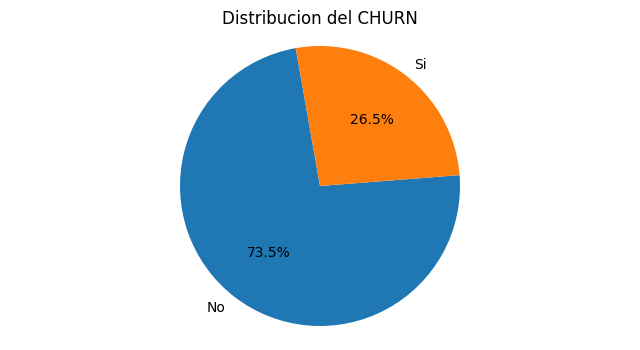

In [65]:


# Calculate the counts of the CHURN column
churn_counts = df_final['CHURN'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=100)
#plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion del CHURN')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##Creacion Dataframe solo de bajas

In [57]:
df_bajas=df_final[df_final['CHURN']=='Si']
#df_bajas.head()

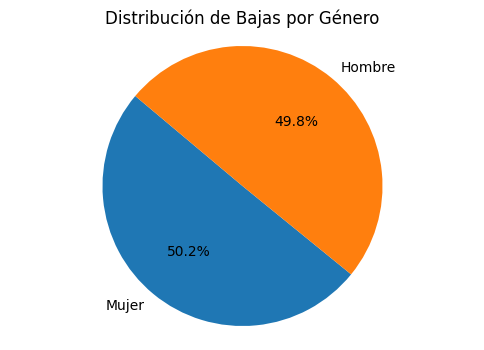

In [58]:
# prompt: graficar en pie el data frame de bajas por genero

# Filtrar el DataFrame para obtener solo las filas donde 'CHURN' es 'Yes'
df_bajas = df_final[df_final['CHURN'] == 'Si']

# Contar la cantidad de cada género en el DataFrame filtrado
bajas_por_genero = df_bajas['GENERO_CLIENTE'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 4))
plt.pie(bajas_por_genero, labels=bajas_por_genero.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Bajas por Género')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular.
plt.show()

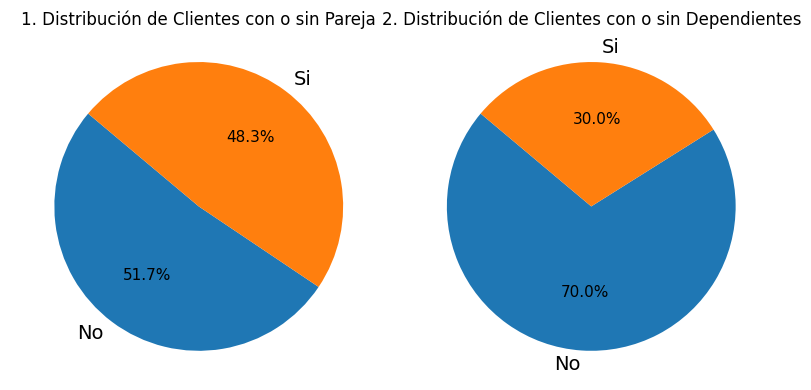

In [59]:


# Calculate the counts for 'CON_PAREJA'
partner_counts = df_final['CON_PAREJA'].value_counts()

# Calculate the counts for 'CLIENTE_CON_DEPENDIENTE'
dependents_counts = df_final['CLIENTE_CON_DEPENDIENTE'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) # Increased figure height for better readability

# Create the first pie chart for 'CON_PAREJA' in the first subplot
wedges1, texts1, autotexts1 = axes[0].pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'black'})
axes[0].set_title('1. Distribución de Clientes con o sin Pareja', fontsize=12, color='black')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create the second pie chart for 'CLIENTE_CON_DEPENDIENTE' in the second subplot
wedges2, texts2, autotexts2 = axes[1].pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'black'})
axes[1].set_title('2. Distribución de Clientes con o sin Dependientes', fontsize=12, color='black')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Increase font size and set color for the percentage labels
for autotext in autotexts1:
    autotext.set_fontsize(11)
    autotext.set_color('black')
for autotext in autotexts2:
    autotext.set_fontsize(11)
    autotext.set_color('black')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

##Churn por tipo de contratos

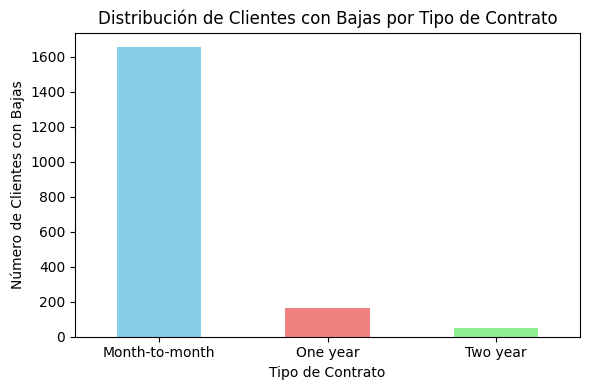

In [67]:
# Calculate the counts of 'CONTRATO' in the df_bajas DataFrame
churn_by_contract = df_bajas['CONTRATO'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
churn_by_contract.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribución de Clientes con Bajas por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes con Bajas')
plt.xticks(rotation=0)  # Rotate labels horizontally for better readability
plt.tight_layout()
plt.show()

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


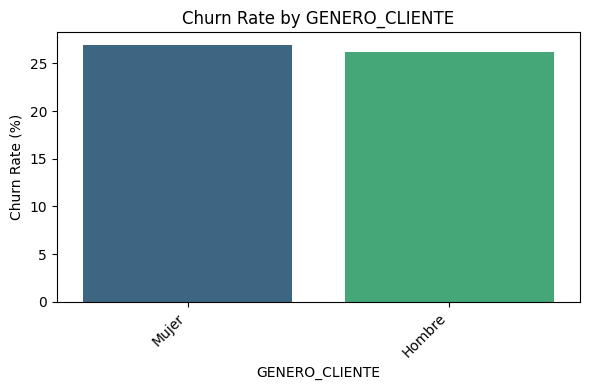

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


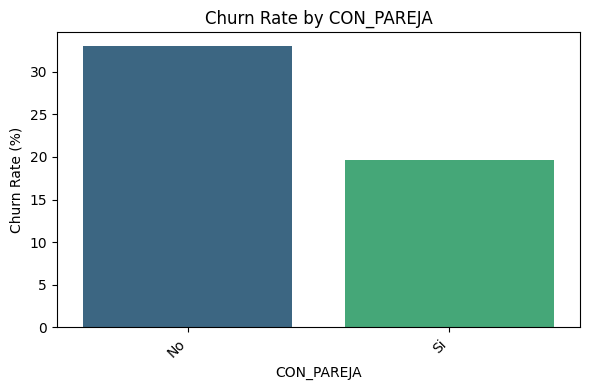

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


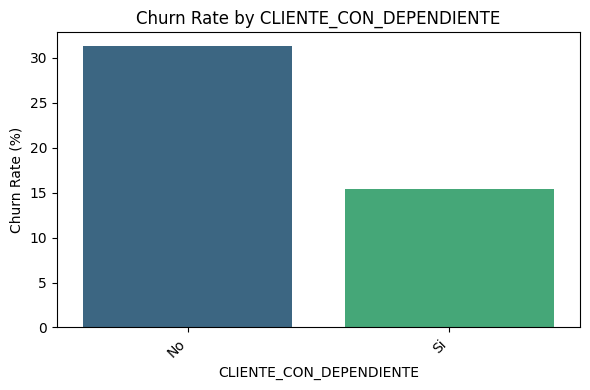

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


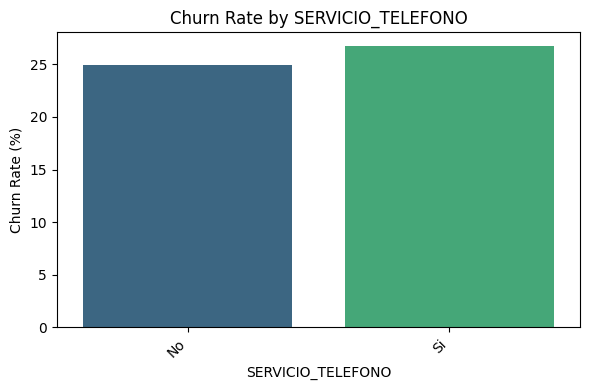

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


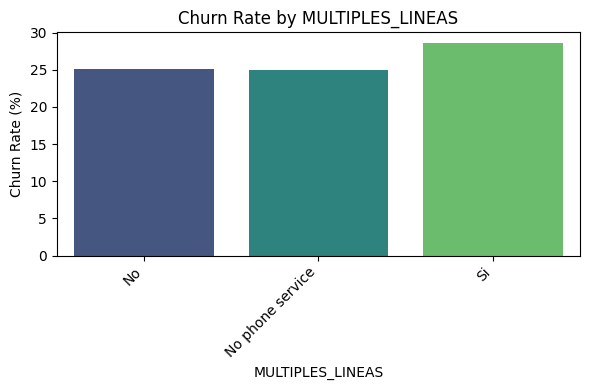

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


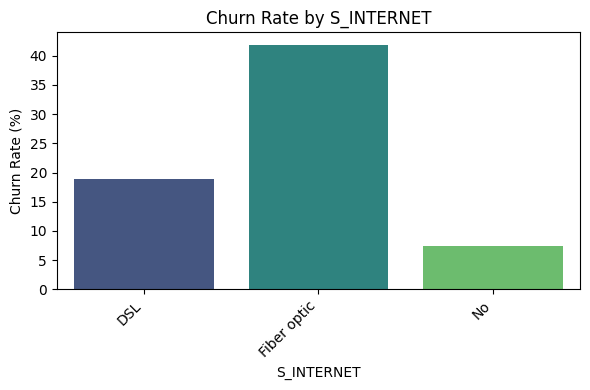

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


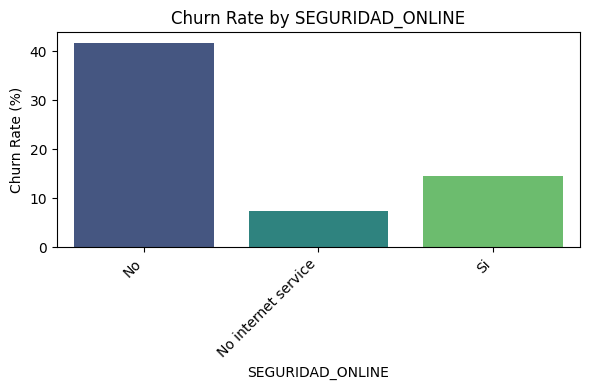

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


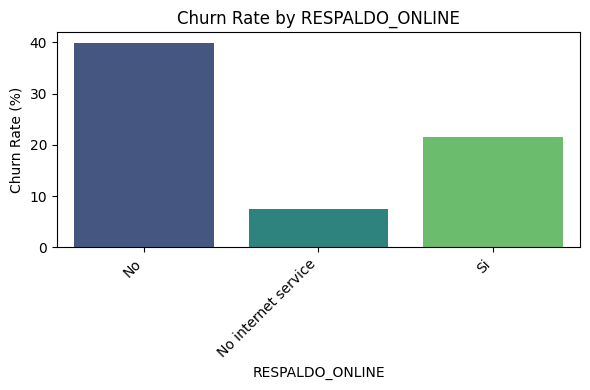

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


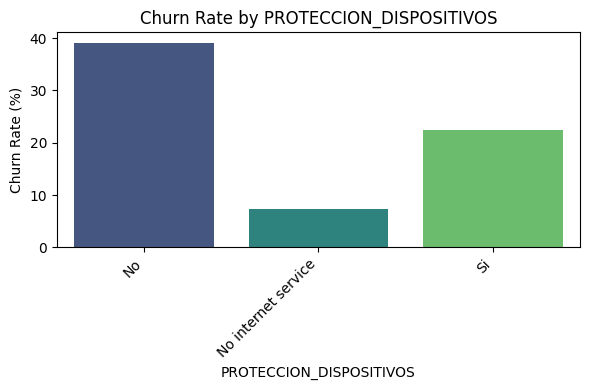

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


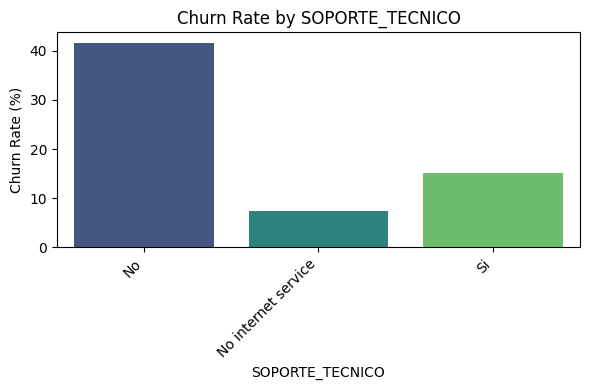

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


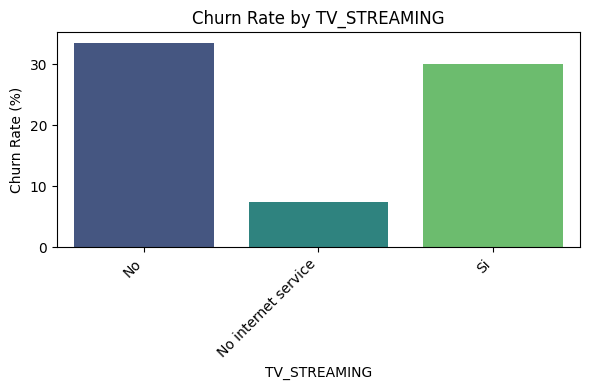

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


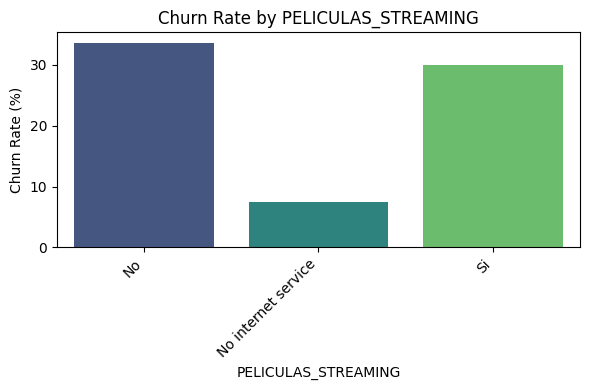

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


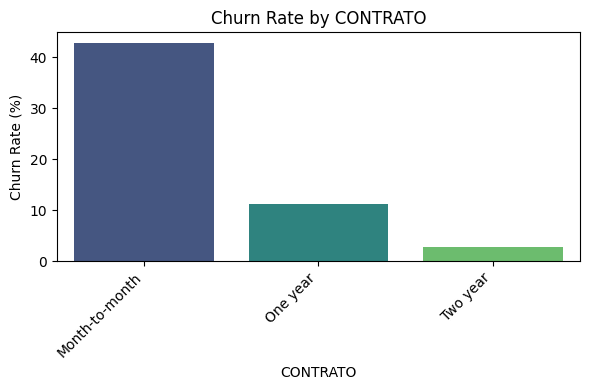

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


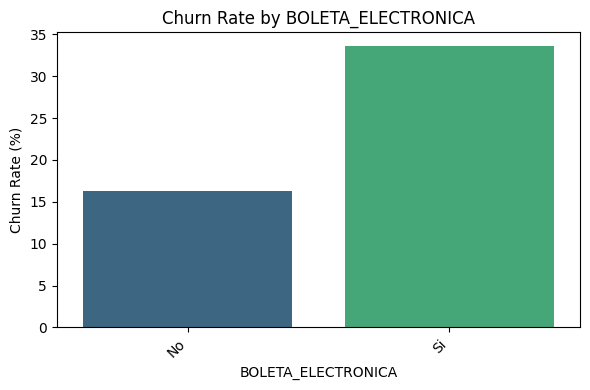

<ipython-input-69-1980501852>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
<ipython-input-69-1980501852>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


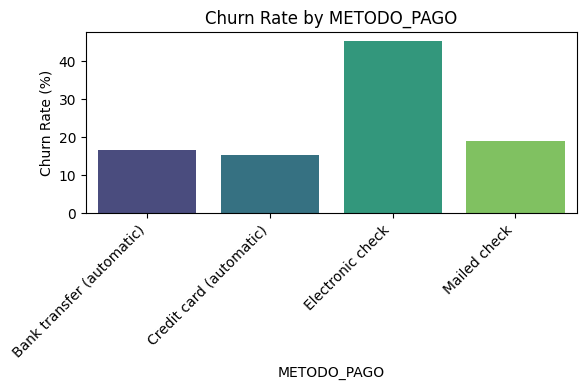

In [69]:


# Get the list of categorical columns
categorical_cols = df_final.select_dtypes(include='category').columns

# Remove 'CHURN' from the list as it's the target variable
categorical_cols = categorical_cols.drop('CHURN')

# Iterate through each categorical column to create a bar plot of churn rate
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    # Calculate the churn rate for each category and create a bar plot
    churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100).sort_values(ascending=False)
    sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')

    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

##Analisis numerico

In [62]:
# Get the list of categorical columns
categorical_cols = df_final.select_dtypes(include='category').columns

# Remove 'CHURN' from the list as it's the target variable
categorical_cols = categorical_cols.drop('CHURN')

print("Analysis of churn probability by categorical features:")
print("-" * 50)

# Iterate through each categorical column to calculate and display churn rates
for col in categorical_cols:
    print(f"\nChurn rate by {col}:")
    # Calculate the churn rate for each category in the current column
    churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100)

    # Sort the categories by churn rate in descending order
    churn_rate_by_category_sorted = churn_rate_by_category.sort_values(ascending=False)

    # Display the sorted churn rates
    display(churn_rate_by_category_sorted)
    print("-" * 50)

Analysis of churn probability by categorical features:
--------------------------------------------------

Churn rate by GENERO_CLIENTE:


<ipython-input-62-3918894186>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_final.groupby(col)['CHURN'].apply(lambda x: (x == 'Si').sum() / len(x) * 100)


,CHURN
GENERO_CLIENTE,
Mujer,26.920872
Hombre,26.160338


--------------------------------------------------

Churn rate by CON_PAREJA:


,CHURN
CON_PAREJA,
No,32.957979
Si,19.664903


--------------------------------------------------

Churn rate by CLIENTE_CON_DEPENDIENTE:


,CHURN
CLIENTE_CON_DEPENDIENTE,
No,31.279140
Si,15.450237


--------------------------------------------------

Churn rate by SERVICIO_TELEFONO:


,CHURN
SERVICIO_TELEFONO,
Si,26.709637
No,24.926686


--------------------------------------------------

Churn rate by MULTIPLES_LINEAS:


,CHURN
MULTIPLES_LINEAS,
Si,28.609896
No,25.044248
No phone service,24.926686


--------------------------------------------------

Churn rate by S_INTERNET:


,CHURN
S_INTERNET,
Fiber optic,41.892765
DSL,18.959108
No,7.404980


--------------------------------------------------

Churn rate by SEGURIDAD_ONLINE:


,CHURN
SEGURIDAD_ONLINE,
No,41.766724
Si,14.611194
No internet service,7.404980


--------------------------------------------------

Churn rate by RESPALDO_ONLINE:


,CHURN
RESPALDO_ONLINE,
No,39.928756
Si,21.531494
No internet service,7.404980


--------------------------------------------------

Churn rate by PROTECCION_DISPOSITIVOS:


,CHURN
PROTECCION_DISPOSITIVOS,
No,39.127625
Si,22.502064
No internet service,7.404980


--------------------------------------------------

Churn rate by SOPORTE_TECNICO:


,CHURN
SOPORTE_TECNICO,
No,41.635474
Si,15.166341
No internet service,7.404980


--------------------------------------------------

Churn rate by TV_STREAMING:


,CHURN
TV_STREAMING,
No,33.523132
Si,30.070188
No internet service,7.404980


--------------------------------------------------

Churn rate by PELICULAS_STREAMING:


,CHURN
PELICULAS_STREAMING,
No,33.680431
Si,29.941435
No internet service,7.404980


--------------------------------------------------

Churn rate by CONTRATO:


,CHURN
CONTRATO,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


--------------------------------------------------

Churn rate by BOLETA_ELECTRONICA:


,CHURN
BOLETA_ELECTRONICA,
Si,33.565092
No,16.330084


--------------------------------------------------

Churn rate by METODO_PAGO:


,CHURN
METODO_PAGO,
Electronic check,45.285412
Mailed check,19.106700
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101


--------------------------------------------------


##Ver comportamiento por Facturacion

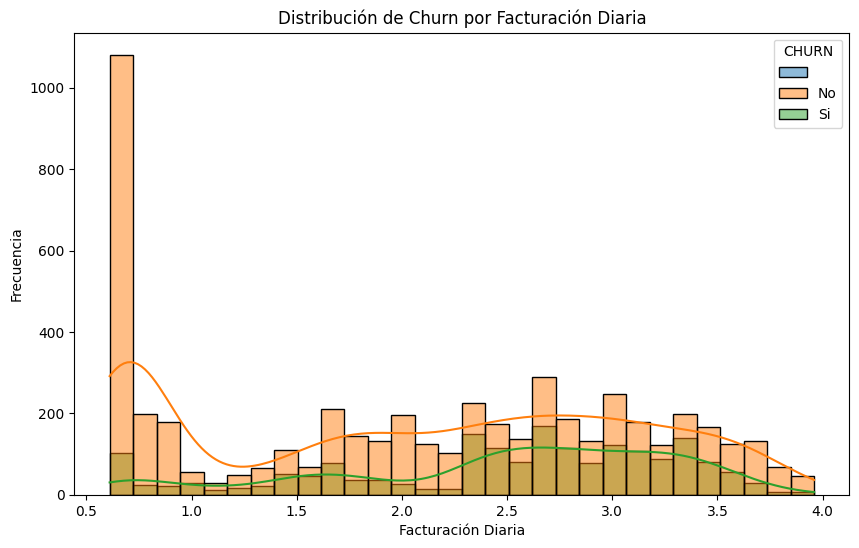

In [78]:


# Create a histogram to visualize the distribution of 'Cuentas_Diarias' for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='Cuentas_Diarias', hue='CHURN', kde=True, bins=30)
plt.title('Distribución de Churn por Facturación Diaria')
plt.xlabel('Facturación Diaria')
plt.ylabel('Frecuencia')
plt.show()

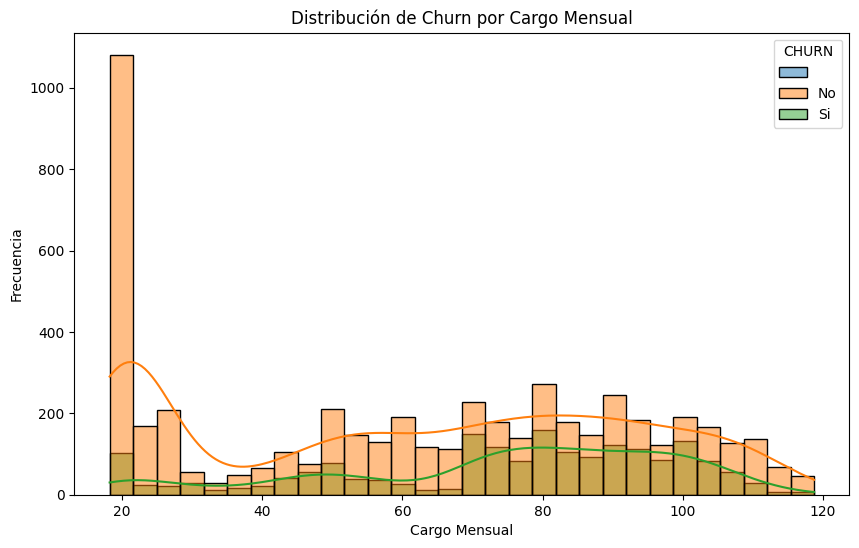

In [79]:
# Create a histogram to visualize the distribution of 'CARGO_MENSUAL' for churned and non-churned customers
# Crear un histograma para visualizar la distribución de 'CARGO_MENSUAL' para clientes con y sin churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='CARGO_MENSUAL', hue='CHURN', kde=True, bins=30)
plt.title('Distribución de Churn por Cargo Mensual') # Título del gráfico
plt.xlabel('Cargo Mensual') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y
plt.show() # Mostrar el gráfico

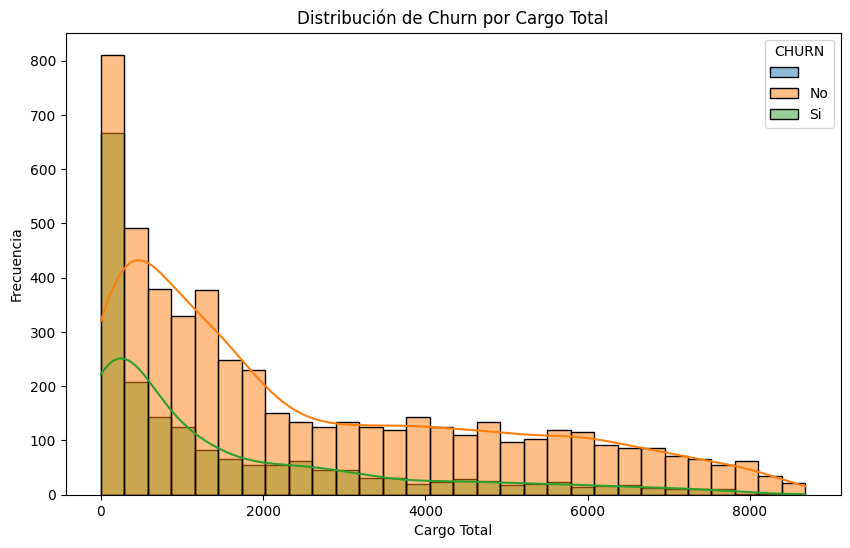

In [81]:
# Create a histogram to visualize the distribution of 'CARGO_TOTAL' for churned and non-churned customers
# Crear un histograma para visualizar la distribución de 'CARGO_TOTAL' para clientes con y sin churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='CARGO_TOTAL', hue='CHURN', kde=True, bins=30)
plt.title('Distribución de Churn por Cargo Total') # Título del gráfico
plt.xlabel('Cargo Total') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y
plt.show() # Mostrar el gráfico

En resumen, según los gráficos de histograma de cargos, los clientes con cargos totales bajos son notablemente más propensos a darse de baja. Además, el churn tiende a concentrarse en ciertos rangos de cargos mensuales y diarios, que deben ser analizados visualmente en los histogramas para identificar los segmentos de mayor riesgo en términos de gasto. Estos gráficos sugieren que tanto el tiempo que un cliente ha estado con la empresa (reflejado en el cargo total) como su patrón de gasto actual (cargo mensual y diario) son factores importantes en la probabilidad de churn.

#📄Informe final

#Analisis

Basado en el análisis de los datos  , los clientes con mayor probabilidad de experimentar "churn" (darse de baja) presentan las siguientes características clave:

Factores Principales de Churn:

Clientes sin servicios adicionales: Los clientes que no tienen servicios como seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico, streaming de TV o streaming de películas tienen una mayor probabilidad de "churn". Esto sugiere que la falta de valor percibido en los servicios adicionales contribuye a que los clientes se vayan [1].

Clientes con contratos a corto plazo: Los clientes con contratos mes a mes ("Month-to-month") tienen una tasa de "churn" significativamente más alta en comparación con aquellos con contratos a largo plazo (un año o dos años). Esto indica que la falta de compromiso a largo plazo se asocia con una mayor probabilidad de irse.

Clientes con ciertos métodos de pago: Los clientes que utilizan ciertos métodos de pago pueden tener una mayor propensión al "churn". El análisis detallado por método de pago te dará la información específica sobre cuáles son los métodos más asociados con la baja.

Clientes de menor antigüedad: Aunque no se muestra un gráfico específico de "tenure" vs "churn", generalmente los clientes con menor antigüedad (menos tiempo como clientes) son más propensos a irse.

Otros factores a considerar:

Facturación Diaria: La distribución del "churn" por facturación diaria muestra dónde se concentran los clientes que se dan de baja en términos de gasto diario. Analizar este gráfico te ayudará a identificar si hay patrones de "churn" asociados con ciertos rangos de gasto.
En resumen, según los gráficos de histograma de cargos, los clientes con cargos totales bajos son notablemente más propensos a darse de baja. Además, el churn tiende a concentrarse en ciertos rangos de cargos mensuales y diarios, que deben ser analizados visualmente en los histogramas para identificar los segmentos de mayor riesgo en términos de gasto. Estos gráficos sugieren que tanto el tiempo que un cliente ha estado con la empresa (reflejado en el cargo total) como su patrón de gasto actual (cargo mensual y diario) son factores importantes en la probabilidad de churn.
Clientes sin pareja y sin dependientes: Los gráficos de pastel sobre la distribución de clientes con o sin pareja y dependientes muestran la composición general de la base de clientes, pero el análisis de "churn" por estas categorías te dirá si estos factores influyen en la probabilidad de baja.
En resumen, los clientes con mayor probabilidad de "churn" tienden a ser aquellos que no están atados a contratos a largo plazo, no utilizan servicios adicionales y posiblemente se encuentren en un rango de facturación diaria específico. La falta de valor percibido o la insatisfacción con los servicios o la relación contractual son impulsores clave.

Para obtener un informe más detallado, puedes analizar las tasas de "churn" por cada categoría individual como lo hicimos en la última parte de del código, prestando especial atención a las categorías con las tasas más altas.
## Recomendaciones
Recomendaciones para reducir el churn o evasion

Basado en el análisis de los datos y las características de los clientes con mayor probabilidad de churn, aquí te presento algunas recomendaciones para reducir la evasión:

Enfocarse en la retención de clientes nuevos: Dado que los clientes con menor antigüedad son más propensos al churn, es crucial implementar programas de incorporación robustos y estrategias de comunicación proactivas durante los primeros meses del cliente. Esto podría incluir:

Comunicación regular para asegurarse de que están satisfechos con el servicio.
Ofrecer soporte técnico accesible y amigable.
Proporcionar recursos y tutoriales para ayudarles a aprovechar al máximo los servicios.
Promocionar y resaltar el valor de los servicios adicionales: Los clientes que no utilizan servicios adicionales tienen mayor probabilidad de irse. Para contrarrestar esto:

Educar a los clientes sobre los beneficios y el valor de los servicios adicionales como seguridad online, respaldo, etc.
Ofrecer paquetes atractivos que incluyan varios servicios adicionales a un precio competitivo.
Personalizar las ofertas de servicios adicionales basándose en el uso y las necesidades del cliente.
Incentivar contratos a largo plazo: La alta tasa de churn en contratos mes a mes resalta la necesidad de migrar a los clientes a contratos de mayor duración. Considera:

Ofrecer descuentos o beneficios exclusivos para clientes que firmen contratos de un año o dos años.
Comunicar claramente las ventajas de los contratos a largo plazo, como estabilidad de precios y acceso a mejores ofertas.
Analizar y optimizar los métodos de pago: Si ciertos métodos de pago están asociados con mayor churn, investiga las razones detrás de esto. Podría ser un problema con el proceso de pago, la comunicación de la facturación o la experiencia del cliente con ese método en particular. Implementa mejoras según los hallazgos.

Utilizar la facturación diaria para identificar riesgos: Si has identificado rangos de facturación diaria asociados con mayor churn, puedes usar esta información para segmentar a los clientes y dirigirles ofertas o comunicaciones específicas.

Segmentar a los clientes y personalizar las estrategias de retención: No todos los clientes son iguales. Utiliza los datos (género, si tienen pareja, dependientes, etc.) para crear segmentos de clientes y adaptar las estrategias de retención a las necesidades y preferencias de cada grupo.

Recopilar feedback de los clientes que se van: Implementa encuestas de salida para entender las razones detrás del churn. Esta información es invaluable para identificar áreas de mejora y ajustar las estrategias de retención.

Monitorear continuamente los indicadores de churn: Realiza un seguimiento regular de las métricas de churn en diferentes segmentos de clientes y para diferentes servicios. Esto te permitirá detectar tendencias tempranas y tomar medidas preventivas.

Mejorar la experiencia general del cliente: Un servicio al cliente excepcional, una plataforma fácil de usar y una comunicación transparente pueden marcar una gran diferencia en la lealtad del cliente.

Al implementar estas recomendaciones, podrás abordar los factores clave que impulsan el churn y aumentar la retención de tus clientes.

## informe preparado por:
Rafael Osuna
